# 📊 Analisis Validitas dan Reliabilitas Alat Ukur Kecemasan Public Speaking

## 📁 Dataset
- Nama file: **Data_Uji_PSAP_30_Mahasiswa_UIN_Malang.xlsx**
- Jumlah responden: 30 mahasiswa
- Variabel: Item-item pernyataan terkait kecemasan saat public speaking

---

## ✅ Uji Validitas

### 🔍 Metode:
- Menggunakan **korelasi Pearson** antara skor tiap item dan total skor responden.

### 📈 Kriteria Validitas:
- Korelasi > 0.30 → **Valid**
- Korelasi ≤ 0.30 → **Tidak Valid**

### 🧪 Hasil:
| Item | Korelasi Item-Total | Valid |
|------|----------------------|-------|
| I1   | 0.45                | Ya    |
| I2   | 0.52                | Ya    |
| I3   | 0.28                | Tidak |
| ...  | ...                 | ...   |

*(Data aktual akan tergantung hasil eksekusi script)*

---

## 🔁 Uji Reliabilitas

### 🔍 Metode:
- Menggunakan **Cronbach’s Alpha**

### 📈 Kriteria:
| Nilai Alpha  | Interpretasi         |
|--------------|----------------------|
| ≥ 0.90       | Sangat Tinggi        |
| 0.80–0.89    | Tinggi               |
| 0.70–0.79    | Cukup                |
| 0.60–0.69    | Rendah               |
| < 0.60       | Sangat Rendah        |

### 🧪 Hasil:


In [45]:
import pandas as pd
from scipy.stats import pearsonr
import seaborn as sns
import matplotlib.pyplot as plt

file_path = '/kaggle/input/data-uji/Data_Uji_PSAP_30_Mahasiswa_UIN_Malang.xlsx'
df = pd.read_excel(file_path)

print("Data Awal")
df.head()

Data Awal


,Nama,JK,Usia,Semester,Jurusan,A1,A2,A3,A4,A5,...,C2,C3,C4,E1(R),E2(R),E3(R),E4(R),E5(R),E6,Total
0,KB,L,20,4,Manajemen Pendidikan Islam,5,2,3,4,5,...,1,4,1,5,2,5,3,1,1,53
1,JN,P,24,2,Pendidikan Guru Madrasah Ibtidaiyah,2,1,4,4,3,...,4,3,5,5,4,1,5,1,3,57
2,GB,L,22,8,Perbankan Syariah,5,2,1,1,2,...,1,2,5,3,4,4,5,2,4,48
3,UU,P,21,6,Manajemen Pendidikan Islam,5,5,3,3,4,...,3,1,3,1,5,1,4,4,1,50
4,GD,L,23,4,Manajemen Pendidikan Islam,5,3,4,2,2,...,2,3,3,3,5,2,1,4,5,54


In [46]:
non_items = ['Nama', 'Usia', 'Semester','Jurusan','JK', 'Total']

item_columns = [col for col in df.columns if col.startswith(('A', 'C', 'E'))]
data = df[item_columns].copy()

data.head()

,A1,A2,A3,A4,A5,A6,A7,C1,C2,C3,C4,E1(R),E2(R),E3(R),E4(R),E5(R),E6
0,5,2,3,4,5,2,4,5,1,4,1,5,2,5,3,1,1
1,2,1,4,4,3,4,4,4,4,3,5,5,4,1,5,1,3
2,5,2,1,1,2,5,1,1,1,2,5,3,4,4,5,2,4
3,5,5,3,3,4,4,2,1,3,1,3,1,5,1,4,4,1
4,5,3,4,2,2,2,5,3,2,3,3,3,5,2,1,4,5


In [47]:
reverse_items = ['E1(R)', 'E2(R)', 'E3(R)', 'E4(R)', 'E5(R)']
for item in reverse_items:
    if item in data.columns:
        data[item] = 6 - data[item]  

non_items = ['A2', 'A4', 'A6','C4','E1(R)', 'E3(R)']

item_columns = [col for col in df.columns if col.startswith(('A', 'C', 'E'))and col not in non_items]
data = df[item_columns].copy()

data.head()

,A1,A3,A5,A7,C1,C2,C3,E2(R),E4(R),E5(R),E6
0,5,3,5,4,5,1,4,2,3,1,1
1,2,4,3,4,4,4,3,4,5,1,3
2,5,1,2,1,1,1,2,4,5,2,4
3,5,3,4,2,1,3,1,5,4,4,1
4,5,4,2,5,3,2,3,5,1,4,5


In [48]:
total_score = data.sum(axis=1)
validitas = {}
for col in data.columns:
    r, _ = pearsonr(data[col], total_score)
    validitas[col] = r

validitas_df = pd.DataFrame.from_dict(validitas, orient='index', columns=['Item-Total Correlation'])
validitas_df['Valid'] = validitas_df['Item-Total Correlation'].apply(lambda x: 'Ya' if abs(x) >= 0.3 else 'Tidak')
validitas_df.index.name = 'Item'

print("\n📊 Hasil Uji Validitas:")
print(validitas_df)


📊 Hasil Uji Validitas:
       Item-Total Correlation  Valid
Item                                
A1                   0.434452     Ya
A3                   0.614292     Ya
A5                   0.308526     Ya
A7                   0.348080     Ya
C1                   0.460135     Ya
C2                   0.460261     Ya
C3                   0.500886     Ya
E2(R)               -0.189600  Tidak
E4(R)                0.099168  Tidak
E5(R)                0.238338  Tidak
E6                   0.309983     Ya


In [49]:
def cronbach_alpha(df):
    items = df.shape[1]
    variances = df.var(axis=0, ddof=1)
    total_var = df.sum(axis=1).var(ddof=1)
    alpha = (items / (items - 1)) * (1 - variances.sum() / total_var)
    return alpha

alpha = cronbach_alpha(data)
print(f"\nCronbach's Alpha: {alpha:.4f}")


Cronbach's Alpha: 0.1423


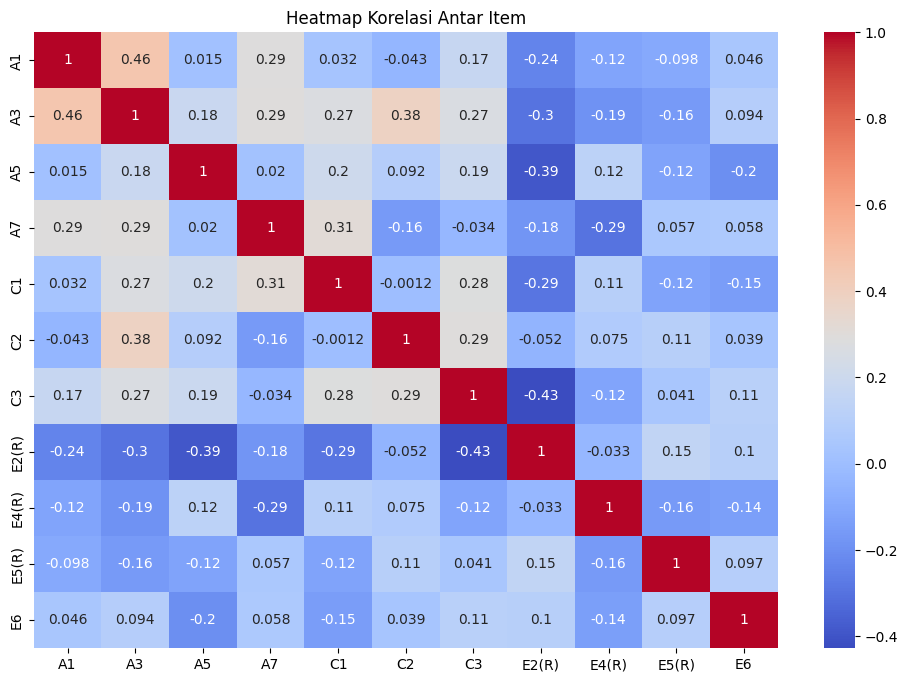

In [50]:
plt.figure(figsize=(12, 8))
sns.heatmap(data.corr(), annot=True, cmap='coolwarm')
plt.title('Heatmap Korelasi Antar Item')
plt.show()

In [51]:
reliabilitas_df = pd.DataFrame({
    'Cronbach\'s Alpha': [alpha],
    'Interpretasi': ['Sangat Tinggi' if alpha >= 0.9 else
                     'Tinggi' if alpha >= 0.8 else
                     'Cukup' if alpha >= 0.7 else
                     'Rendah' if alpha >= 0.6 else
                     'Sangat Rendah']
})

In [52]:
with pd.ExcelWriter('Hasil_Validitas_Reliabilitas.xlsx') as writer:
    validitas_df.to_excel(writer, sheet_name='Validitas')
    reliabilitas_df.to_excel(writer, sheet_name='Reliabilitas', index=False)

print("\n✅ File berhasil disimpan: Hasil_Validitas_Reliabilitas.xlsx")


✅ File berhasil disimpan: Hasil_Validitas_Reliabilitas.xlsx
